In [44]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import regularizers, optimizers
from keras.callbacks import History
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

In [45]:
types = [
        "Normal",
        "Fire",
        "Water",
        "Electric",
        "Grass",
        "Ice",
        "Fighting",
        "Poison",
        "Ground",
        "Flying",
        "Psychic",
        "Bug",
        "Rock",
        "Ghost",
        "Dragon",
        "Dark",
        "Steel",
        "Fairy"
]

In [46]:
df = pd.read_csv("/workspace/data/pokemon_data.csv")
df["Types"]=df["Types"].apply(lambda x:x.split(","))

In [57]:
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
dataframe=df[:500],
directory="/workspace/data/images2",
x_col="Filenames",
y_col="Types",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=types,
target_size=(64,64))

valid_generator=test_datagen.flow_from_dataframe(
dataframe=df[500:750],
directory="/workspace/data/images2",
x_col="Filenames",
y_col="Types",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
classes=types,
target_size=(64,64))

test_generator=test_datagen.flow_from_dataframe(
dataframe=df[750:],
directory="/workspace/data/images2",
x_col="Filenames",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(64,64))

Found 500 validated image filenames belonging to 18 classes.
Found 250 validated image filenames belonging to 18 classes.
Found 51 validated image filenames.


In [58]:
model = Sequential()

model.add(Conv2D(32, (8, 8), padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (8, 8)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(AveragePooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='sigmoid'))

model.compile(optimizers.Adam(lr=1e-4),loss="binary_crossentropy",metrics=["accuracy"])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 64, 64, 32)        6176      
_________________________________________________________________
activation_30 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 57, 57, 32)        65568     
_________________________________________________________________
activation_31 (Activation)   (None, 57, 57, 32)        0         
_________________________________________________________________
average_pooling2d_10 (Averag (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
__________

In [60]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = History()

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[history],
)

Epoch 1/10
15/15 [==============================] - 19s 1s/step - loss: 0.3897 - acc: 0.8774 - val_loss: 0.3133 - val_acc: 0.9162
Epoch 2/10
15/15 [==============================] - 13s 878ms/step - loss: 0.3048 - acc: 0.9146 - val_loss: 0.3051 - val_acc: 0.9167
Epoch 3/10
15/15 [==============================] - 13s 854ms/step - loss: 0.2948 - acc: 0.9177 - val_loss: 0.3079 - val_acc: 0.9156
Epoch 4/10
15/15 [==============================] - 13s 845ms/step - loss: 0.2881 - acc: 0.9170 - val_loss: 0.2938 - val_acc: 0.9167
Epoch 5/10
15/15 [==============================] - 13s 855ms/step - loss: 0.2774 - acc: 0.9185 - val_loss: 0.2926 - val_acc: 0.9167
Epoch 6/10
15/15 [==============================] - 12s 827ms/step - loss: 0.2753 - acc: 0.9160 - val_loss: 0.2838 - val_acc: 0.9164
Epoch 7/10
15/15 [==============================] - 13s 844ms/step - loss: 0.2579 - acc: 0.9174 - val_loss: 0.2839 - val_acc: 0.9182
Epoch 8/10
15/15 [==============================] - 13s 894ms/step - los

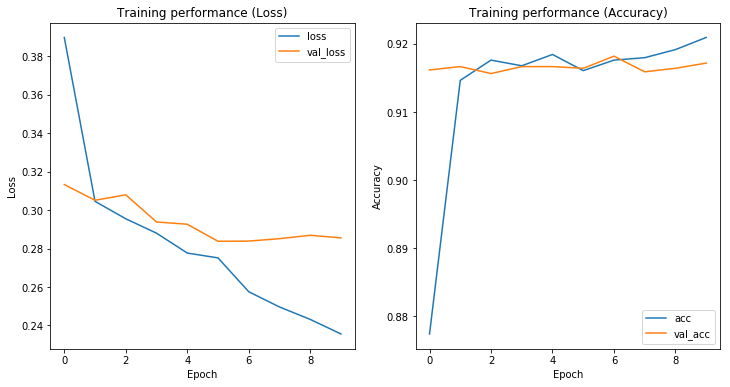

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Training performance (Loss)')
ax[0].plot(history.epoch, history.history['loss'], label='loss')
ax[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].legend()

ax[1].set_title('Training performance (Accuracy)')
ax[1].plot(history.epoch, history.history['acc'], label='acc')
ax[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].legend(loc='best')

In [52]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

51/51 [==============================] - 2s 38ms/step


In [53]:
pred[1]

array([0.1475234 , 0.02593535, 0.01859346, 0.01303062, 0.00458238,
       0.00190079, 0.00260034, 0.33006364, 0.00820893, 0.02720189,
       0.04353401, 0.04177392, 0.01454273, 0.2081685 , 0.00744647,
       0.02353525, 0.02129625, 0.1544859 ], dtype=float32)

In [54]:
pred_bool = (pred >0.5)

In [55]:
predictions=[]
labels = train_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(labels[index])
    predictions.append(",".join(l))
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)